In [1]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../')
from src_experiment import get_path_to_moon_experiment_storage, get_test_moon_path
from geobin import EstimateQuantities1Run, AveragedEstimates

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_test_moon_path(model_name, dataset_name, noise_level, int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


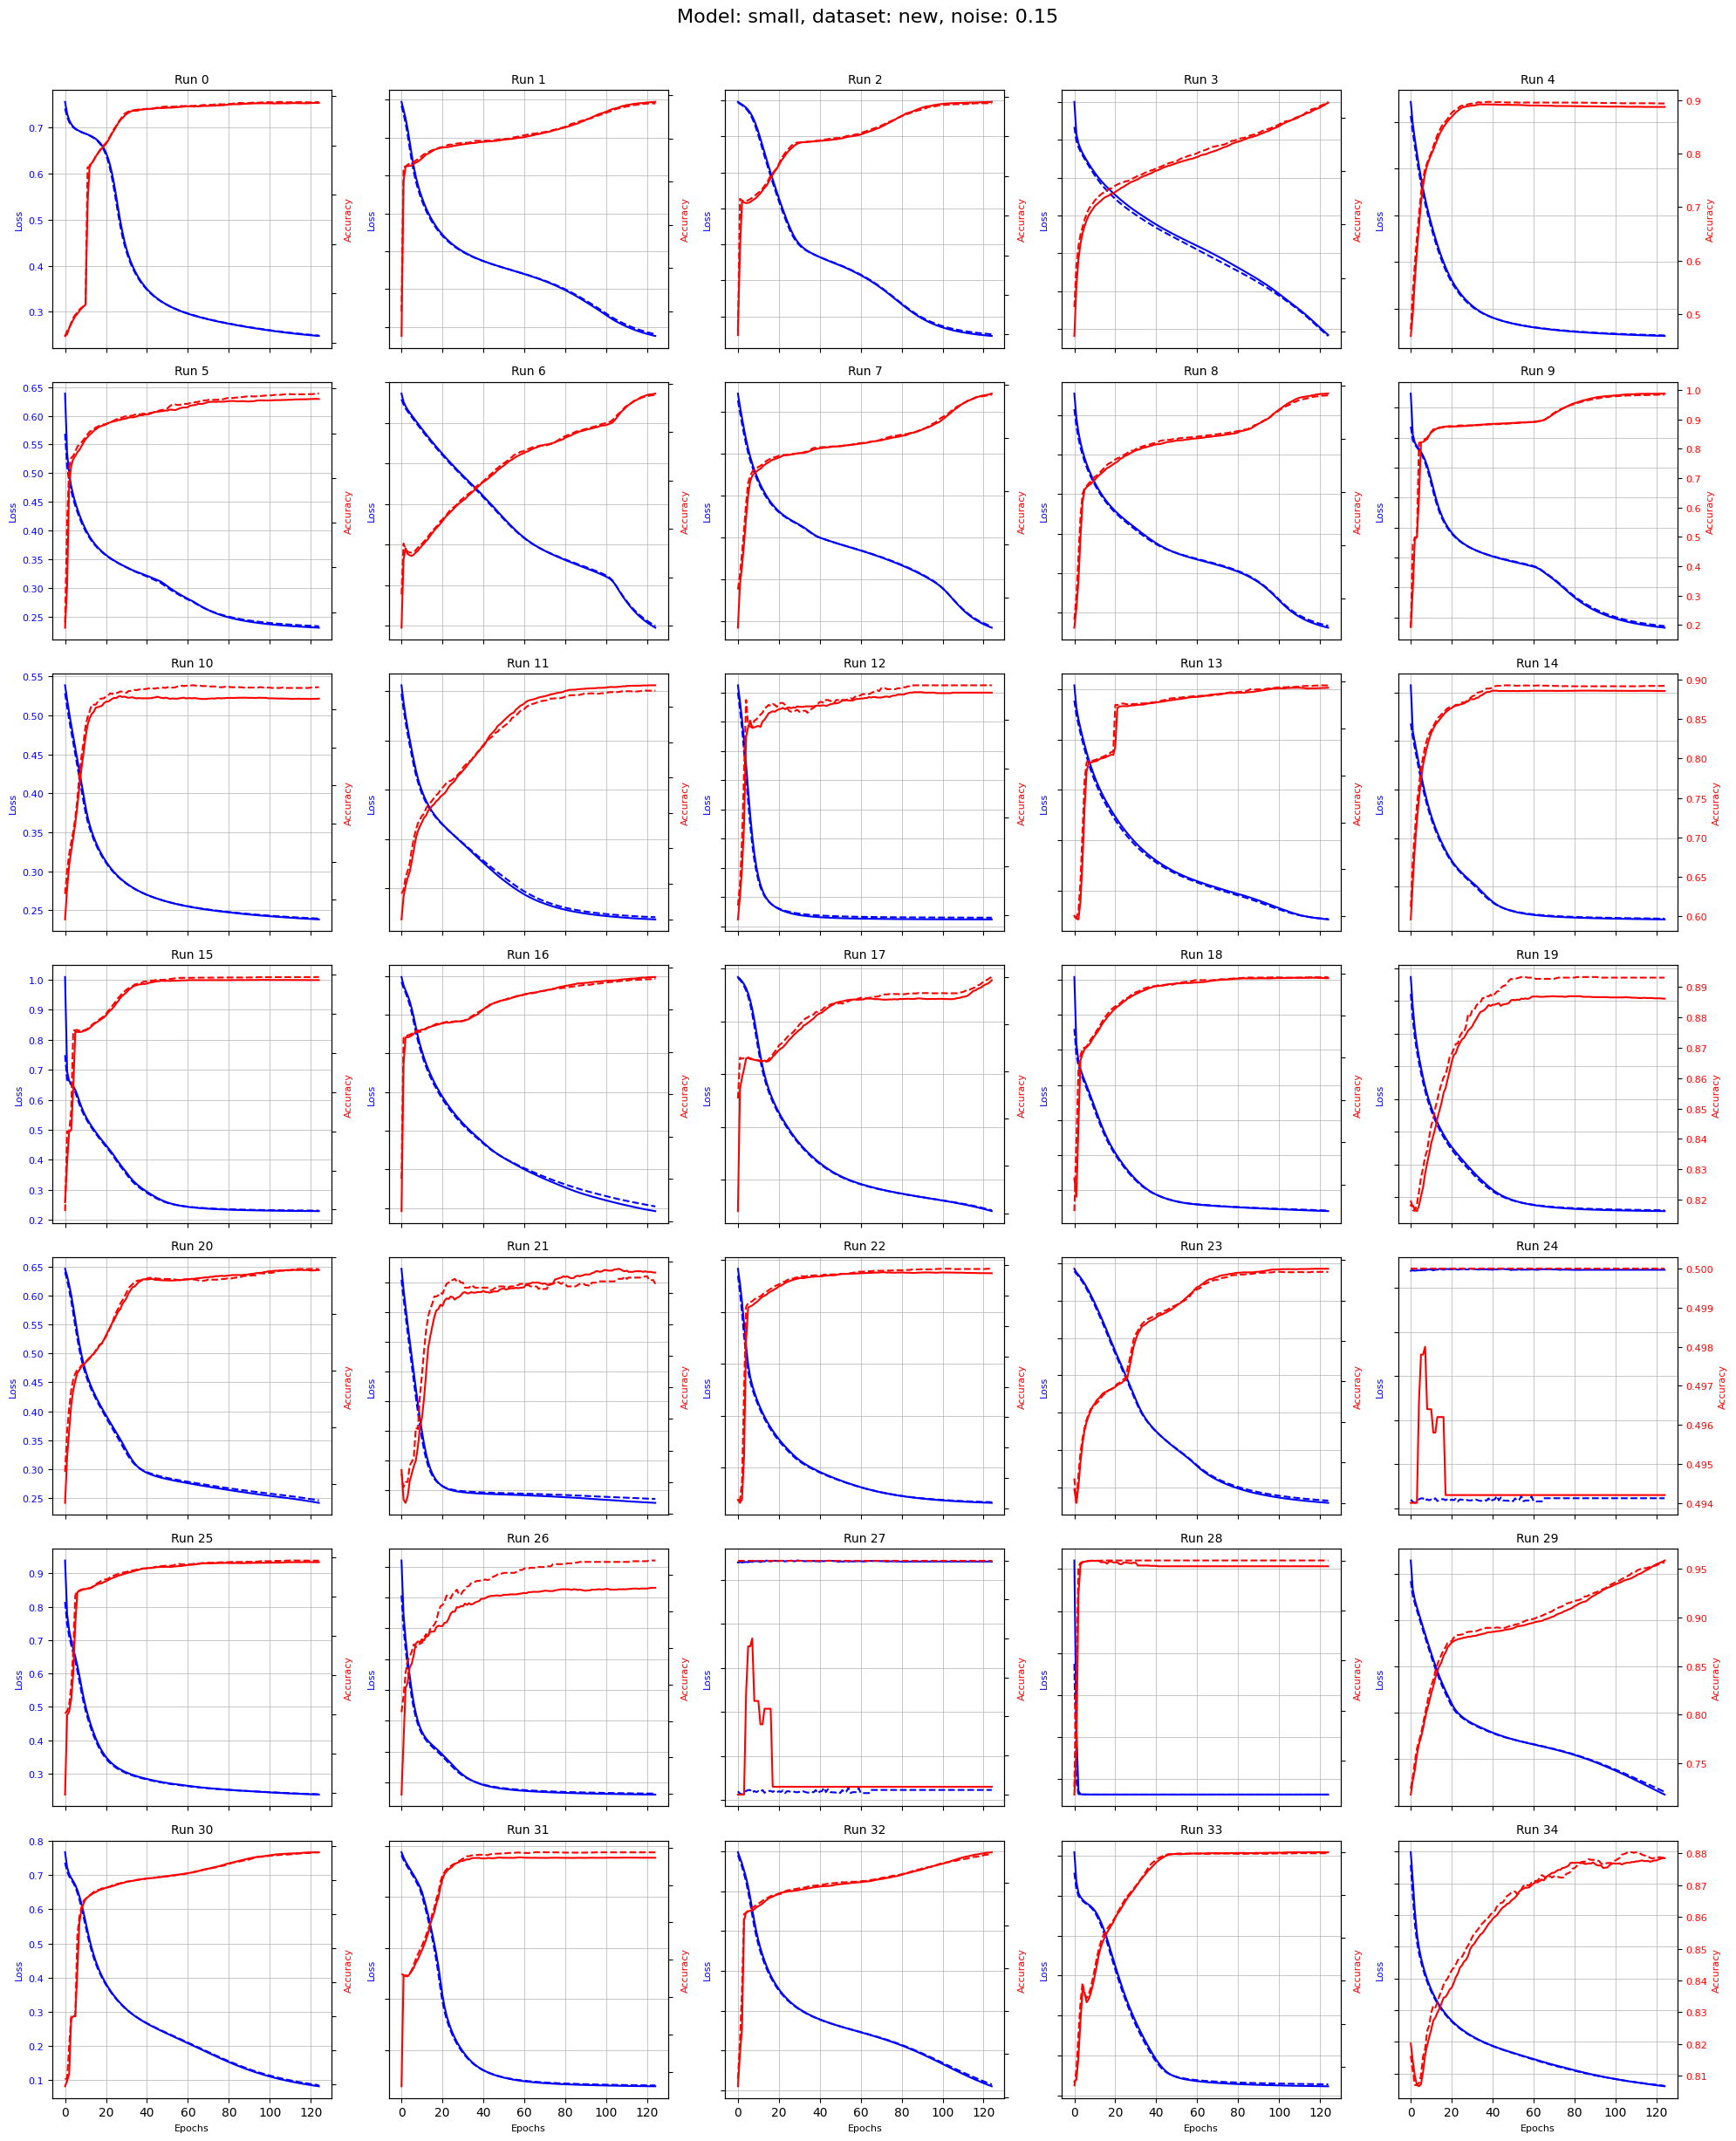

In [3]:
plot_multiple_runs_grid(model_name="small",
                        dataset_name="new",
                        noise_level=0.15)

In [4]:
def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_test_moon_path(model_name, dataset_name, noise_level, int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [6]:
first_run = EstimateQuantities1Run(model_name="small", dataset_name="new", noise_level=0.15, run_number=0)

FileNotFoundError: [Errno 2] No such file or directory: '/home/johan/Documents/phd/WP1/geometric_binning_estimator/stored_data/test_moon/model_small/dataset_new/noise_0.15/run_0/number_counts_per_epoch.pkl'

In [ ]:
MI = first_run.estimates["MI_KL"]
MI

[]

In [ ]:
first_run.calculate_estimates()
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.354562,0.354562,0.354562,0.354562
1,5,0.346935,0.346935,0.346935,0.346935
2,10,0.343210,0.343210,0.343210,0.344812
3,15,0.339311,0.339311,0.339311,0.359207
4,20,0.333720,0.333720,0.333720,0.360598
5,25,0.335475,0.335475,0.335475,0.360815
6,30,0.343981,0.343981,0.343981,0.380716
7,35,0.342435,0.343543,0.344274,0.389928
8,40,0.342511,0.344648,0.344968,0.395085
9,45,0.345462,0.347380,0.348833,0.405150


In [ ]:
import matplotlib.pyplot as plt

def plot_layers_exclude_last(df, lw=2):
    """
    Plot all layers except the last one on the same figure as functions of epoch.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with columns 'epoch' and layers like 'l1', 'l2', ...
    lw : float
        Line width for the curves.
    """
    # All columns except 'epoch' and the last layer
    layers = df.columns[1:-1]  # skip first (epoch) and last
    
    plt.figure(figsize=(10, 6))
    
    for layer in layers:
        plt.plot(df["epoch"], df[layer], lw=lw, label=layer)
    
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Layer values as a function of epoch (excluding last layer)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


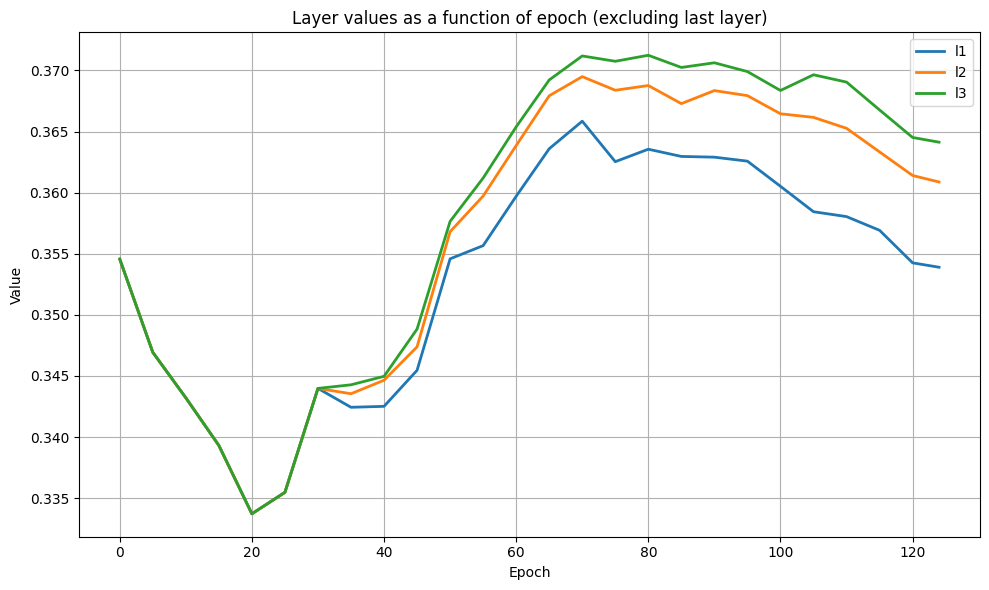

In [ ]:
plot_layers_exclude_last(MI)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_runs_MI_layers_grid(
    model_name,
    dataset_name,
    noise_level,
    run_numbers=np.arange(35, dtype=np.int64),
    figsize=(20, 25),
    lw=1.5
):
    """
    Plot MI_KL layer-wise values (excluding last layer) for multiple runs in a grid.
    
    Each subplot corresponds to one run.
    Bottom row shows x-ticks.
    Leftmost column shows y-ticks.
    """

    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]

        # ---- Load and compute MI estimates for one run ----
        run = EstimateQuantities1Run(
            model_name=model_name,
            dataset_name=dataset_name,
            noise_level=noise_level,
            run_number=int(run_number)
        )
        run.calculate_estimates()
        df = run.estimates["MI_KL"]

        # All layers except 'epoch' and the last layer
        layers = df.columns[1:-1]

        # ---- Plot layers ----
        for layer in layers:
            ax.plot(df["epoch"], df[layer], lw=lw)

        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)

        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols

        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("Epoch", fontsize=8)

        # Only first column keeps y-ticks
        if col != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("MI (KL)", fontsize=8)

        ax.tick_params(axis="both", labelsize=8)

    # Remove unused axes if run_numbers < grid size
    for j in range(len(run_numbers), n_rows * n_cols):
        fig.delaxes(axes[j])

    fig.suptitle(
        f"MI_KL across layers (excluding last)\n"
        f"Model: {model_name}, Dataset: {dataset_name}, Noise: {noise_level}",
        fontsize=16
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


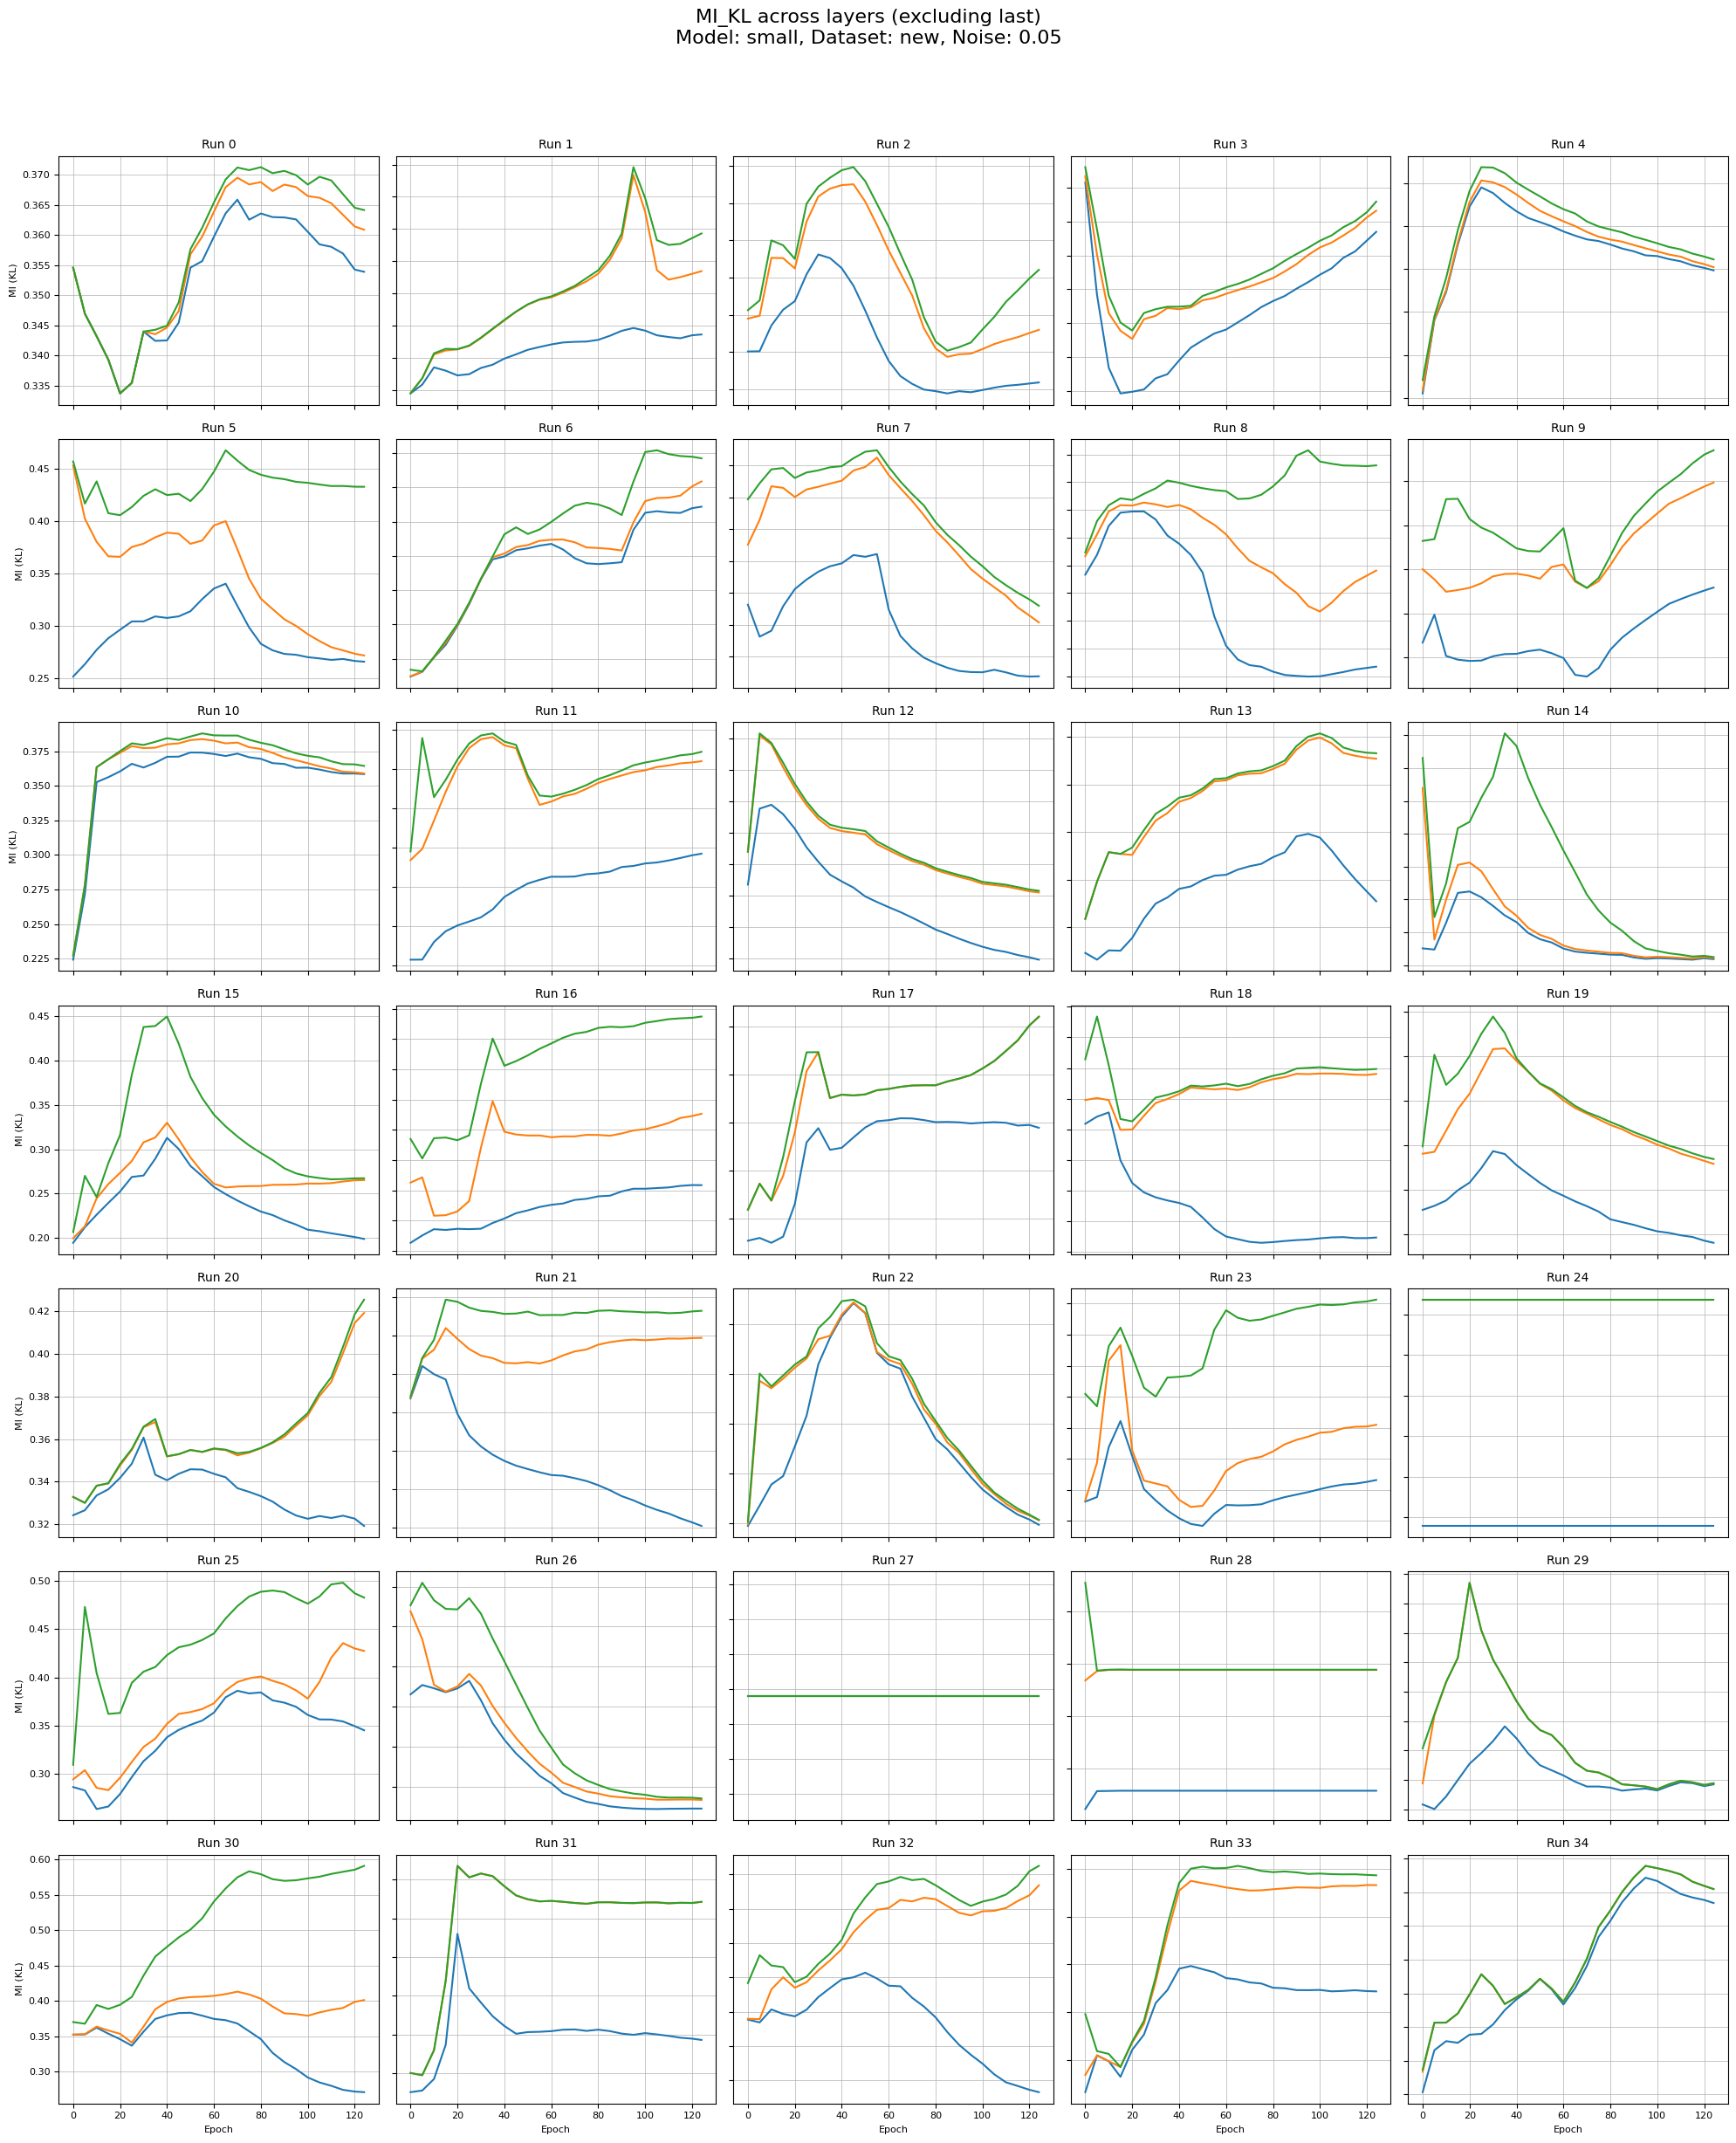

In [ ]:
plot_multiple_runs_MI_layers_grid(
    model_name="small",
    dataset_name="new",
    noise_level=0.05,
    run_numbers=np.arange(35)
)

In [ ]:
avg1 = AveragedEstimates()
avg1._find_from_all_runs()

In [ ]:
dfs = avg1.individual_estimates["MI_KL"]

In [ ]:
all_runs = (
    pd.concat(dfs, keys=range(35), names=["run", "row"])
      .reset_index(level="run")
)


/tmp/ipykernel_610504/3690210677.py:2: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  pd.concat(dfs, keys=range(1, 26), names=["run", "row"])


In [ ]:
all_runs

,run,epoch,l1,l2,l3,l4
row,,,,,,
0,1,0,0.354562,0.354562,0.354562,0.354562
1,1,5,0.346935,0.346935,0.346935,0.346935
2,1,10,0.343210,0.343210,0.343210,0.344812
3,1,15,0.339311,0.339311,0.339311,0.359207
4,1,20,0.333720,0.333720,0.333720,0.360598
...,...,...,...,...,...,...
21,25,105,0.162179,0.162736,0.162736,0.162736
22,25,110,0.162179,0.162736,0.162736,0.162736
23,25,115,0.162179,0.162736,0.162736,0.162736


In [ ]:
summary = (
    all_runs
    .groupby("epoch")[["l1", "l2", "l3", "l4"]]
    .agg(["mean", "std"])
)


In [ ]:
summary

l1                  l2                  l3                  l4  \
           mean       std      mean       std      mean       std      mean   
epoch                                                                         
0      0.278526  0.069415  0.316938  0.087475  0.335930  0.097822  0.347447   
5      0.289688  0.073367  0.331838  0.083209  0.361335  0.100905  0.367976   
10     0.302959  0.077061  0.350869  0.092315  0.373131  0.100661  0.385312   
15     0.308480  0.078726  0.358254  0.092960  0.380368  0.099394  0.394210   
20     0.310278  0.073297  0.357266  0.083363  0.384213  0.091882  0.402987   
25     0.315994  0.071664  0.368726  0.083013  0.397572  0.087083  0.418376   
30     0.320368  0.070841  0.380147  0.081078  0.409855  0.087177  0.435481   
35     0.319140  0.068113  0.383865  0.080980  0.415915  0.091400  0.446360   
40     0.319492  0.066853  0.381873  0.080482  0.414057  0.087822  0.450704   
45     0.318328  0.066429  0.380913  0.081664  0.412983  0.087265  0.454945   
50     0.315380  0.067310  0.376942  0.078047  0.409331  0.085058  0.457438   
55     0.310546  0.068942  0.374708  0.075737  0.409243  0.088284  0.461084   
60     0.304888  0.071199  0.373246  0.074292  0.408958  0.091534  0.464973   
65     0.300784  0.072928  0.370676  0.073668  0.404207  0.090227  0.467760   
70     0.297111  0.073041  0.366983  0.073868  0.401247  0.091689  0.470153   
75     0.294547  0.073019  0.363493  0.076438  0.398973  0.095130  0.474646   
80     0.293465  0.074474  0.362528  0.080253  0.398980  0.099991  0.480585   
85     0.293047  0.075909  0.362885  0.084303  0.400524  0.104432  0.485844   
90     0.293845  0.077665  0.364559  0.089259  0.403826  0.109951  0.491759   
95     0.295434  0.080284  0.369776  0.101027  0.410814  0.119469  0.498224   
100    0.296041  0.081742  0.368837  0.097311  0.410994  0.116811  0.503063   
105    0.295651  0.080954  0.366602  0.091094  0.409045  0.113107  0.506140   
110    0.294933  0.080051  0.367244  0.090114  0.409361  0.112386  0.506879   
115    0.294033  0.079674  0.369019  0.091005  0.410691  0.113287  0.508112   
120    0.294033  0.080429  0.371480  0.092563  0.412928  0.114291  0.509253   
124    0.293559  0.080586  0.373005  0.093863  0.414527  0.115309  0.509964   

                 
            std  
epoch            
0      0.106505  
5      0.104824  
10     0.103017  
15     0.099240  
20     0.092680  
25     0.089585  
30     0.091669  
35     0.097234  
40     0.097723  
45     0.100958  
50     0.105085  
55     0.108626  
60     0.111779  
65     0.113895  
70     0.116356  
75     0.120733  
80     0.125355  
85     0.129377  
90     0.133046  
95     0.137904  
100    0.142667  
105    0.146072  
110    0.147226  
115    0.148458  
120    0.149290  
124    0.149469

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_runs_with_mean_std(dfs, layers=None, alpha_runs=0.2, lw_runs=0.8, lw_mean=2.5):
    """
    Plot all runs as thin lines and overlay mean ± std.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    alpha_runs : float
        Transparency of individual runs.
    lw_runs : float
        Line width of individual runs.
    lw_mean : float
        Line width of mean curve.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    for layer in layers:
        fig, ax = plt.subplots()

        # Plot individual runs
        for _, df in all_runs.groupby("run"):
            ax.plot(df["epoch"], df[layer], alpha=alpha_runs, lw=lw_runs)

        # Mean and std across runs
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        ax.plot(stats["epoch"], stats["mean"], lw=lw_mean, label="mean")
        ax.fill_between(
            stats["epoch"],
            stats["mean"] - stats["std"],
            stats["mean"] + stats["std"],
            alpha=0.3,
            label="±1 std"
        )

        ax.set_xlabel("Epoch")
        ax.set_ylabel(layer)
        ax.set_title(f"{layer}: runs, mean ± std")
        ax.legend()
        ax.grid(True)

        plt.show()


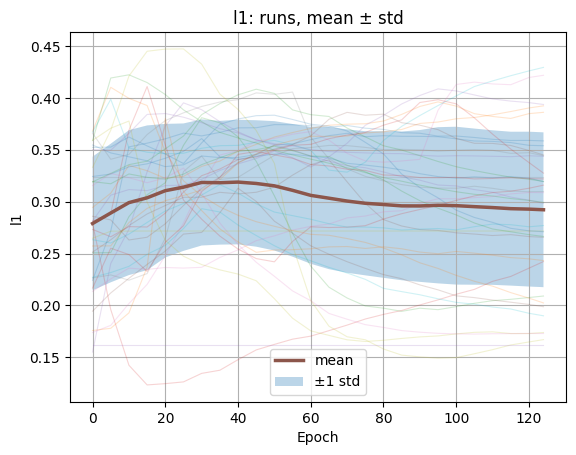

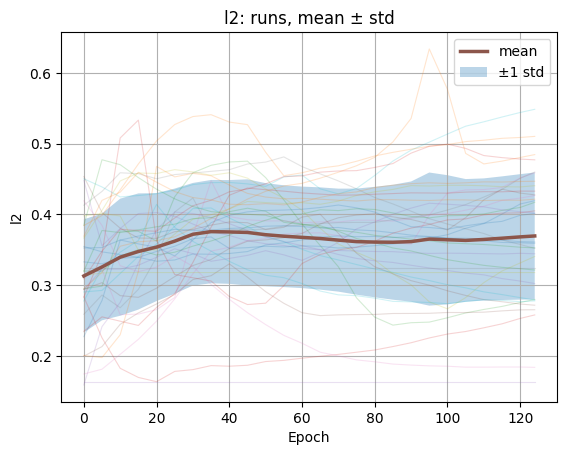

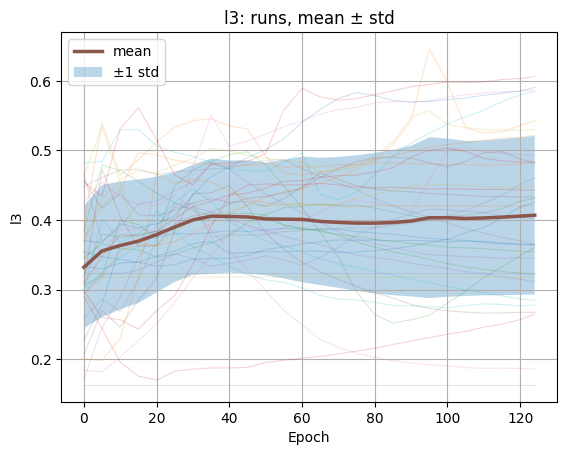

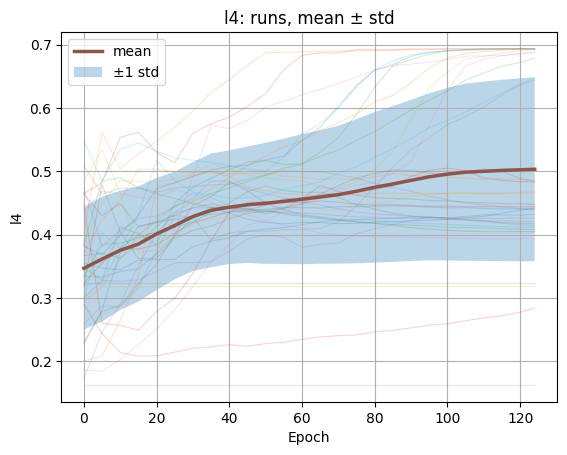

In [ ]:
plot_runs_with_mean_std(dfs)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_layer_means_same_figure(
    dfs,
    layers=None,
    lw_mean=2.5,
    alpha_std=0.25,
    show_std=True,
    logy=True
):
    """
    Plot mean (and optionally ± std) across runs for all layers
    in a single figure, with optional log-scale y-axis.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    lw_mean : float
        Line width of mean curves.
    alpha_std : float
        Transparency of std shading.
    show_std : bool
        Whether to show ±1 std shading.
    logy : bool
        Whether to use logarithmic y-axis.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    fig, ax = plt.subplots(figsize=(10, 6))

    for layer in layers:
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        # Mean curve
        ax.plot(
            stats["epoch"],
            stats["mean"],
            lw=lw_mean,
            label=layer
        )

        # Std shading
        if show_std:
            ax.fill_between(
                stats["epoch"],
                stats["mean"] - stats["std"],
                stats["mean"] + stats["std"],
                alpha=alpha_std
            )

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Value")
    ax.set_title("Layer-wise mean (± std) across runs")

    if logy:
        ax.set_yscale("log")

    ax.legend(title="Layer")
    ax.grid(True, which="both", lw=0.5)
    plt.tight_layout()
    plt.show()


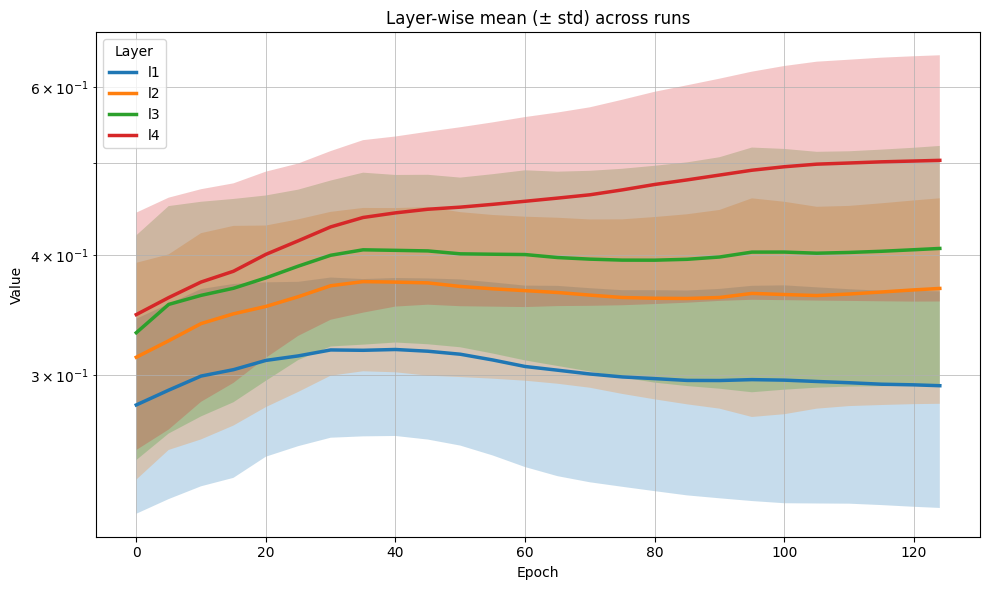

In [ ]:
plot_layer_means_same_figure(
    dfs=dfs,          # list of MI_KL DataFrames
    show_std=True
)
